In [175]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Importing data

In [176]:
data = pd.read_csv('data.csv')

# statistical summarization

In [177]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [178]:
print(f'The average ratio of N, P, K in soil is: {data.describe().iloc[1,0]}, {data.describe().iloc[1,1]}, {data.describe().iloc[1,2]}')
print(f'The average ratio of temperature, humidity, ph, rainfall is: {data.describe().iloc[1,3]}, {data.describe().iloc[1,4]}, {data.describe().iloc[1,5]}, {data.describe().iloc[1,6]}')

The average ratio of N, P, K in soil is: 50.551818181818184, 53.36272727272727, 48.14909090909091
The average ratio of temperature, humidity, ph, rainfall is: 25.616243851779544, 71.48177921778637, 6.469480065256364, 103.46365541576817


# Making dataset

In [179]:
X = data.iloc[:, :data.shape[1] - 1]
y = data['label']
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


# Scaling the dataset

In [180]:
x_scalar = MinMaxScaler().fit_transform(X)

# Distribution of all crops

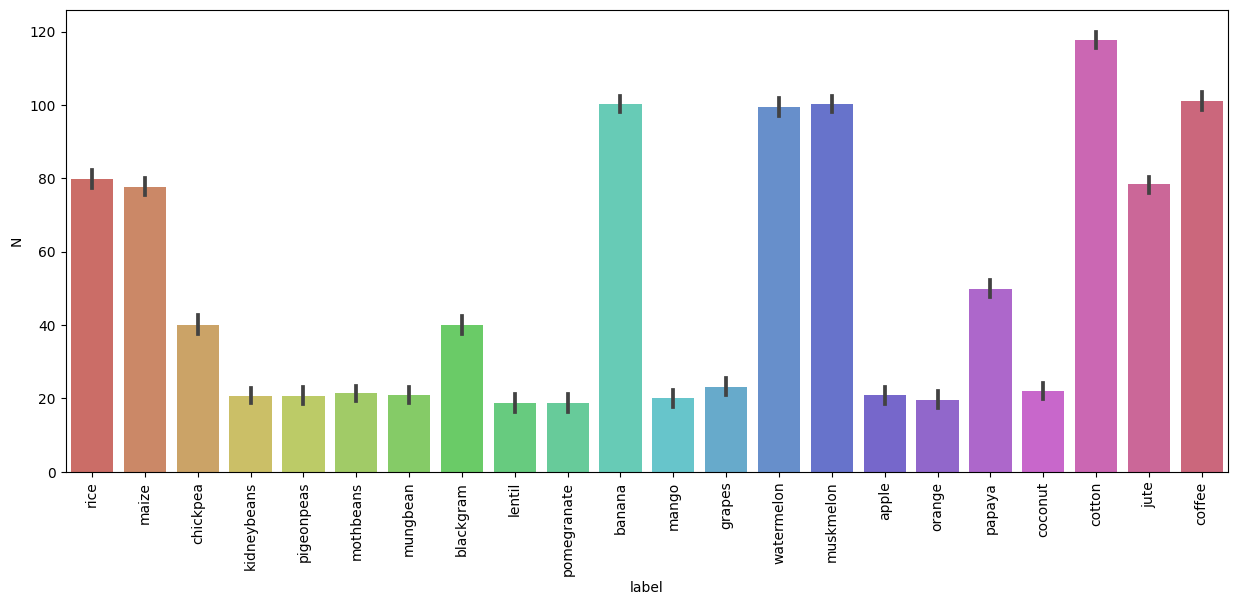

In [181]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Distribution of N, P, K

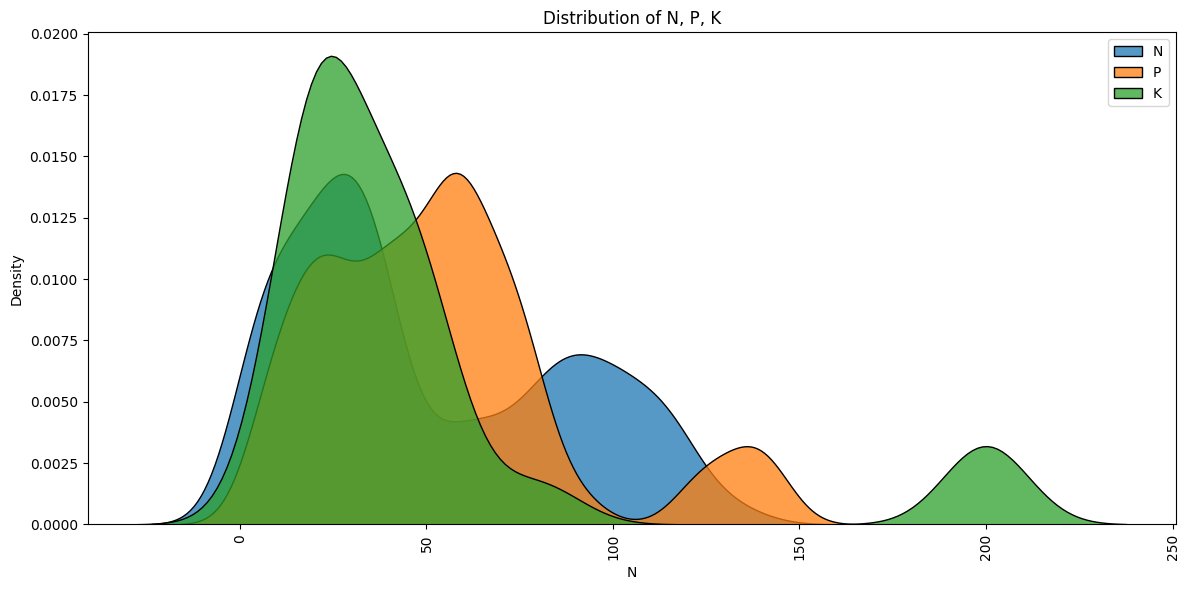

In [203]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data['N'], fill=True, label='N',  ax=ax, multiple='stack')
sns.kdeplot(data['P'], fill=True, label='P', ax=ax, multiple='stack')
sns.kdeplot(data['K'], fill=True, label='K', ax=ax, multiple='stack')
plt.xticks(rotation = 90)
plt.title('Distribution of N, P, K')
ax.legend()
plt.tight_layout()
plt.show()

# Crops in season

In [183]:
print("Summer Crop")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print("winter Crop")
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print("Rainy Crop")
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Crop
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
winter Crop
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crop
['rice' 'papaya' 'coconut']


## K-Means

# WCSS

In [184]:
wcss = []

def elbowMethod():
    for i in range(1, 11):
        km = KMeans(n_clusters=i, n_init=10, random_state=42, init='k-means++', max_iter=100)
        km.fit(x_scalar)
        wcss.append(km.inertia_)
elbowMethod()

<Axes: >

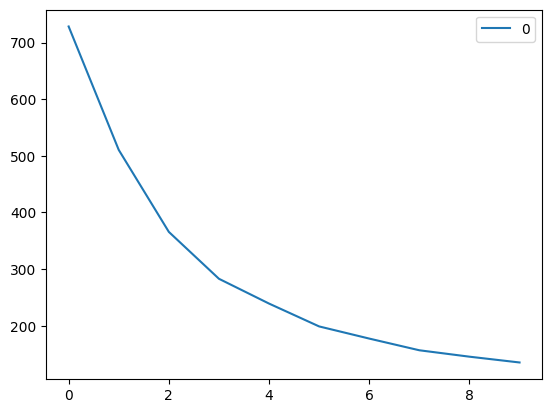

In [185]:
pd.DataFrame(wcss).plot(kind='line')

# Running Kmeans for optimal k value = 3

In [186]:
km = KMeans(n_clusters=3, n_init=10, random_state=42, init='k-means++', max_iter=100)
y_pred = km.fit_predict(x_scalar)
pd.DataFrame(y_pred).head()

,0
0,2
1,2
2,2
3,2
4,2


# Checking labels in clusters

In [187]:
y_pred=pd.DataFrame(y_pred)
z=pd.concat([y_pred,y],axis=1)
z=z.rename(columns={0:'Clusters'})

In [188]:
firstClusterItems = z[z['Clusters']==0]['label'].value_counts()
pd.DataFrame(firstClusterItems)

,count
label,
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
lentil,100
mango,100
blackgram,95
mungbean,39
maize,10


Text(0.5, 0, 'crops')

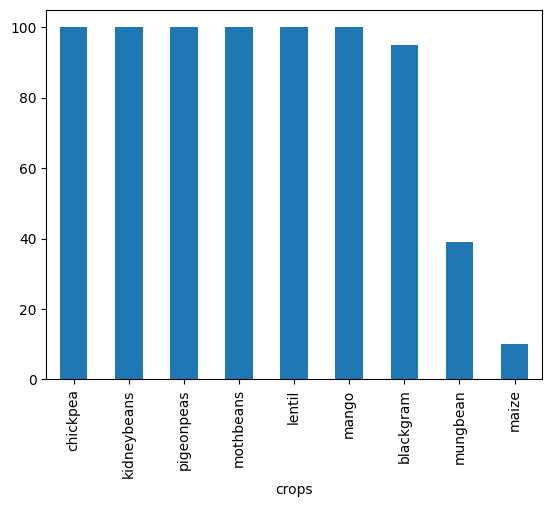

In [189]:
firstClusterItems.plot(kind='bar')
plt.xlabel('crops')

In [190]:
secondClusterItems = z[z['Clusters']==0]['label'].value_counts()
pd.DataFrame(secondClusterItems)

,count
label,
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
lentil,100
mango,100
blackgram,95
mungbean,39
maize,10


Text(0.5, 0, 'crops')

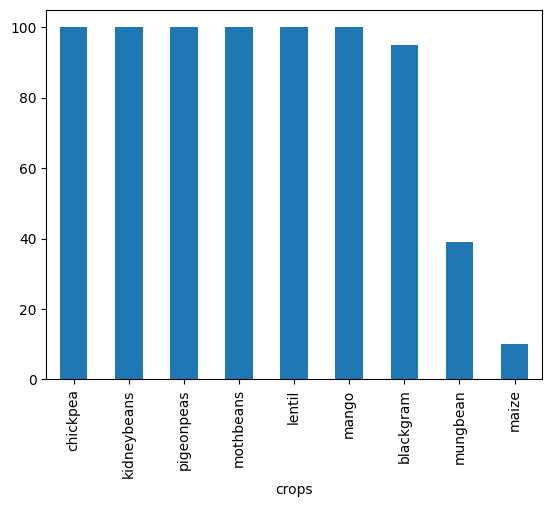

In [191]:
secondClusterItems.plot(kind='bar')
plt.xlabel('crops')

In [192]:
thirdClusterItems = z[z['Clusters']==0]['label'].value_counts()
pd.DataFrame(thirdClusterItems)

,count
label,
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
lentil,100
mango,100
blackgram,95
mungbean,39
maize,10


Text(0.5, 0, 'crops')

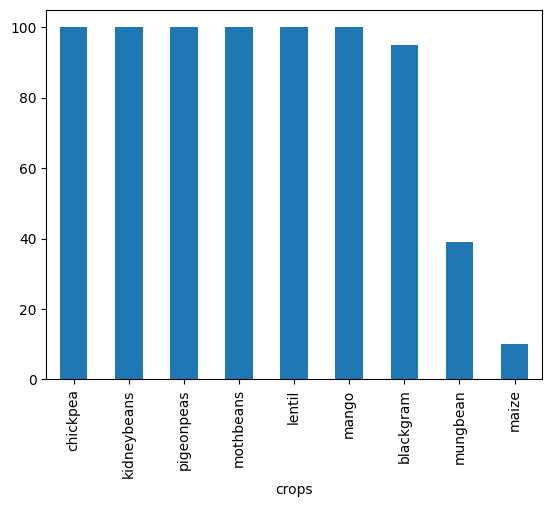

In [193]:
thirdClusterItems.plot(kind='bar')
plt.xlabel('crops')

In [194]:
print("Crops in first cluster")
print(z[z['Clusters']==0]['label'].unique())
print("Crops in second cluster")
print(z[z['Clusters']==1]['label'].unique())
print("Crops in third cluster")
print(z[z['Clusters']==2]['label'].unique())

Crops in first cluster
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'mango']
Crops in second cluster
['grapes' 'apple']
Crops in third cluster
['rice' 'maize' 'mungbean' 'blackgram' 'pomegranate' 'banana' 'watermelon'
 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


## Logistic Regression

# Train-test split

In [195]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.3, random_state=50)

# Making prediction

In [196]:
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

# Confusion matrix

In [197]:
from sklearn.metrics import confusion_matrix
confutionMatrix = confusion_matrix(y_test, y_pred)

<Axes: >

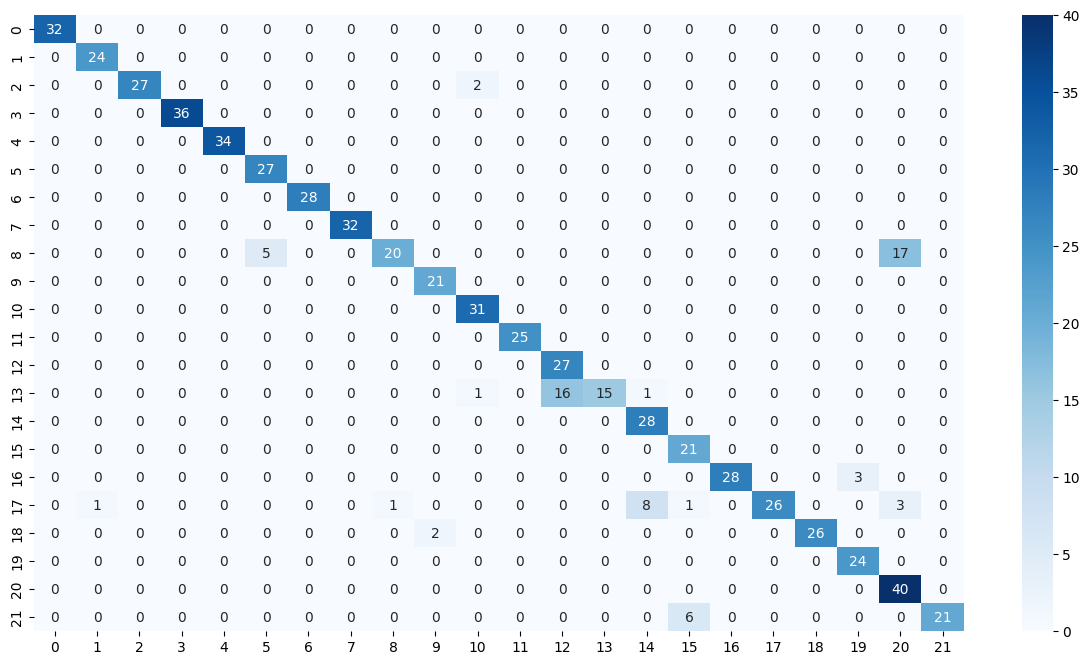

In [198]:
plt.figure(figsize=(15, 8))
sns.heatmap(confutionMatrix, annot=True, cmap='Blues')

# Accuracy of the model

In [199]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8984848484848484

# Prediction for given conditions of climate

In [200]:
print(f'The predicted crop for given conditions of the climate: {model.predict([[200,20,189,20,46,12,126]])[0]}')

The predicted crop for given conditions of the climate: rice
